# K nearest Neighnors with python 

## Import Libraries


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Gettting the dataset

In [28]:
df = pd.read_csv("C:\\Users\\AMAN DONGRE\\Downloads\\tes.csv")

In [29]:
df.head()

,NH3,PM2,PM10,SO2,NOx,CO,O3,AQI,AQI_bucket
0,71.92,327.50,501.99,20.23,141.46,3.35,17.66,490,Severe
1,78.02,387.45,569.04,21.29,176.59,4.06,9.32,574,Severe
2,74.85,399.51,527.45,18.03,133.11,3.52,21.91,522,Severe
3,66.06,313.46,428.54,19.64,91.64,1.89,8.96,449,Severe
4,64.06,251.39,351.39,18.55,63.92,2.23,6.42,401,Severe


## Standardize the Variables

Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale.

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
scaler = StandardScaler()

In [32]:
scaler.fit(df.drop('AQI_bucket',axis=1))

StandardScaler()

In [33]:
scaled_features = scaler.transform(df.drop('AQI_bucket',axis=1))

In [34]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:8])
df_feat.head()

,NH3,PM2,PM10,SO2,NOx,CO,O3,AQI
0,0.253732,1.813501,2.537759,0.028057,2.297723,3.082424,-0.121138,1.614028
1,0.374906,2.421509,3.038051,0.091712,3.237834,4.020566,-0.536182,2.259905
2,0.311935,2.543820,2.727728,-0.104055,2.074269,3.307050,0.090365,1.860076
3,0.137325,1.671108,1.989714,-0.007373,0.964493,1.153287,-0.554098,1.298778
4,0.097596,1.041599,1.414061,-0.072829,0.222680,1.602538,-0.680502,0.929705


## Pair Plot

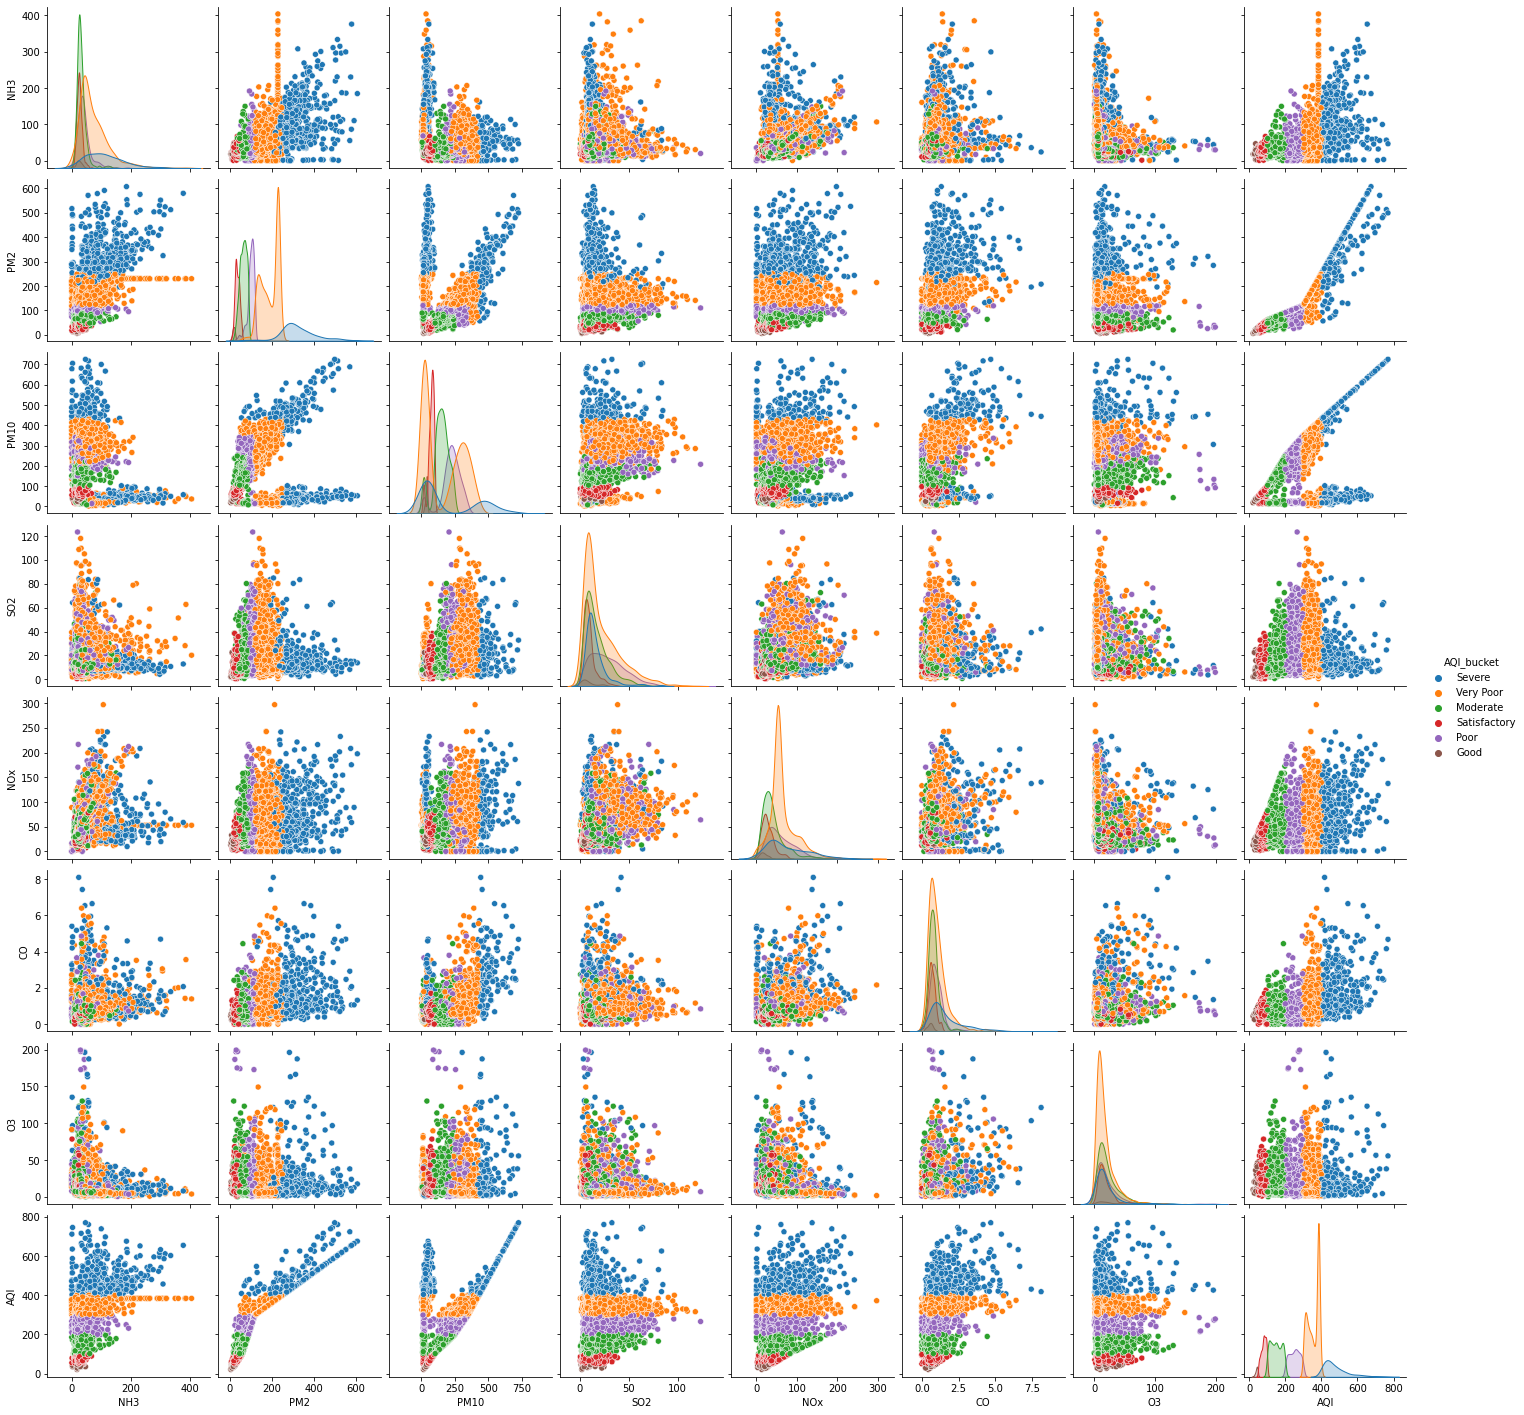

In [35]:
import seaborn as sns

sns.pairplot(df,hue='AQI_bucket')

# Train Test Split


In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['AQI_bucket'],
                                                    test_size=0.30)

## Using KNN

In [38]:
from sklearn.neighbors import KNeighborsClassifier

In [108]:
knn = KNeighborsClassifier(n_neighbors=9)

In [109]:
knn.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=9)

In [110]:
pred = knn.predict(X_test)

In [111]:
len(X_test)

1145

In [112]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

In [125]:
cm= confusion_matrix(y_test,pred)  

Text(42.0, 0.5, 'Truth')

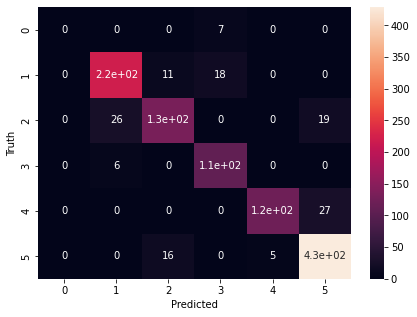

In [126]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [127]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

        Good       0.00      0.00      0.00         7
    Moderate       0.87      0.88      0.88       250
        Poor       0.83      0.74      0.78       176
Satisfactory       0.81      0.95      0.87       114
      Severe       0.96      0.82      0.88       148
   Very Poor       0.90      0.95      0.93       450

    accuracy                           0.88      1145
   macro avg       0.73      0.72      0.72      1145
weighted avg       0.88      0.88      0.88      1145



C:\Users\AMAN DONGRE\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\AMAN DONGRE\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\AMAN DONGRE\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

In [116]:
knn.score(X_test, y_test)

0.8820960698689956

In [117]:
knn.predict([['50.38','13.36','153.4','1.13','12.26','595','594.5384615','50.38']])

C:\Users\AMAN DONGRE\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


array(['Severe'], dtype=object)